In [7]:
import ast 
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
asd = df[df['job_title_short']== 'Data Analyst']
top_offered = asd['job_country'].value_counts()
top_offered

job_country
United States     67816
France            13803
United Kingdom    10482
Germany            7131
Singapore          6632
                  ...  
Brunei                2
Guyana                1
Guinea                1
Curaçao               1
Bhutan                1
Name: count, Length: 158, dtype: int64

In [10]:
df_da_us = df.explode('job_skills')
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['size', 'median'])
df_da_us_top = df_da_us_group.sort_values(by='median', ascending=False).head(10)
df_da_skills = df_da_us_group.sort_values(by='size', ascending=False).head(10)

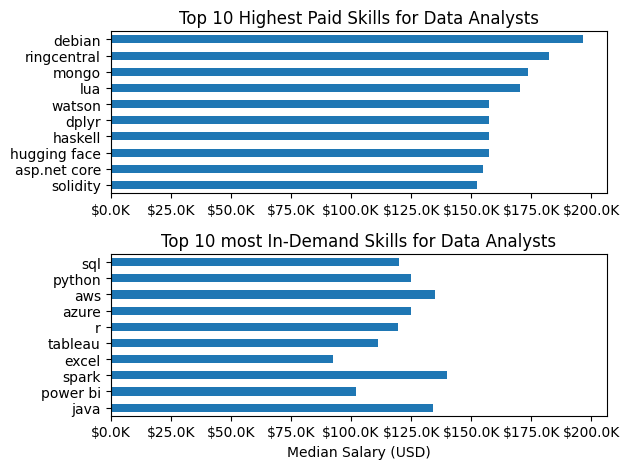

In [11]:
fig, ax = plt.subplots(2, 1)

df_da_us_top[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))

df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))

fig.tight_layout()